4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.5008 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3755 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3366 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2932 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2785 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2649 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2560 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9081
Epoch 10/10
313/

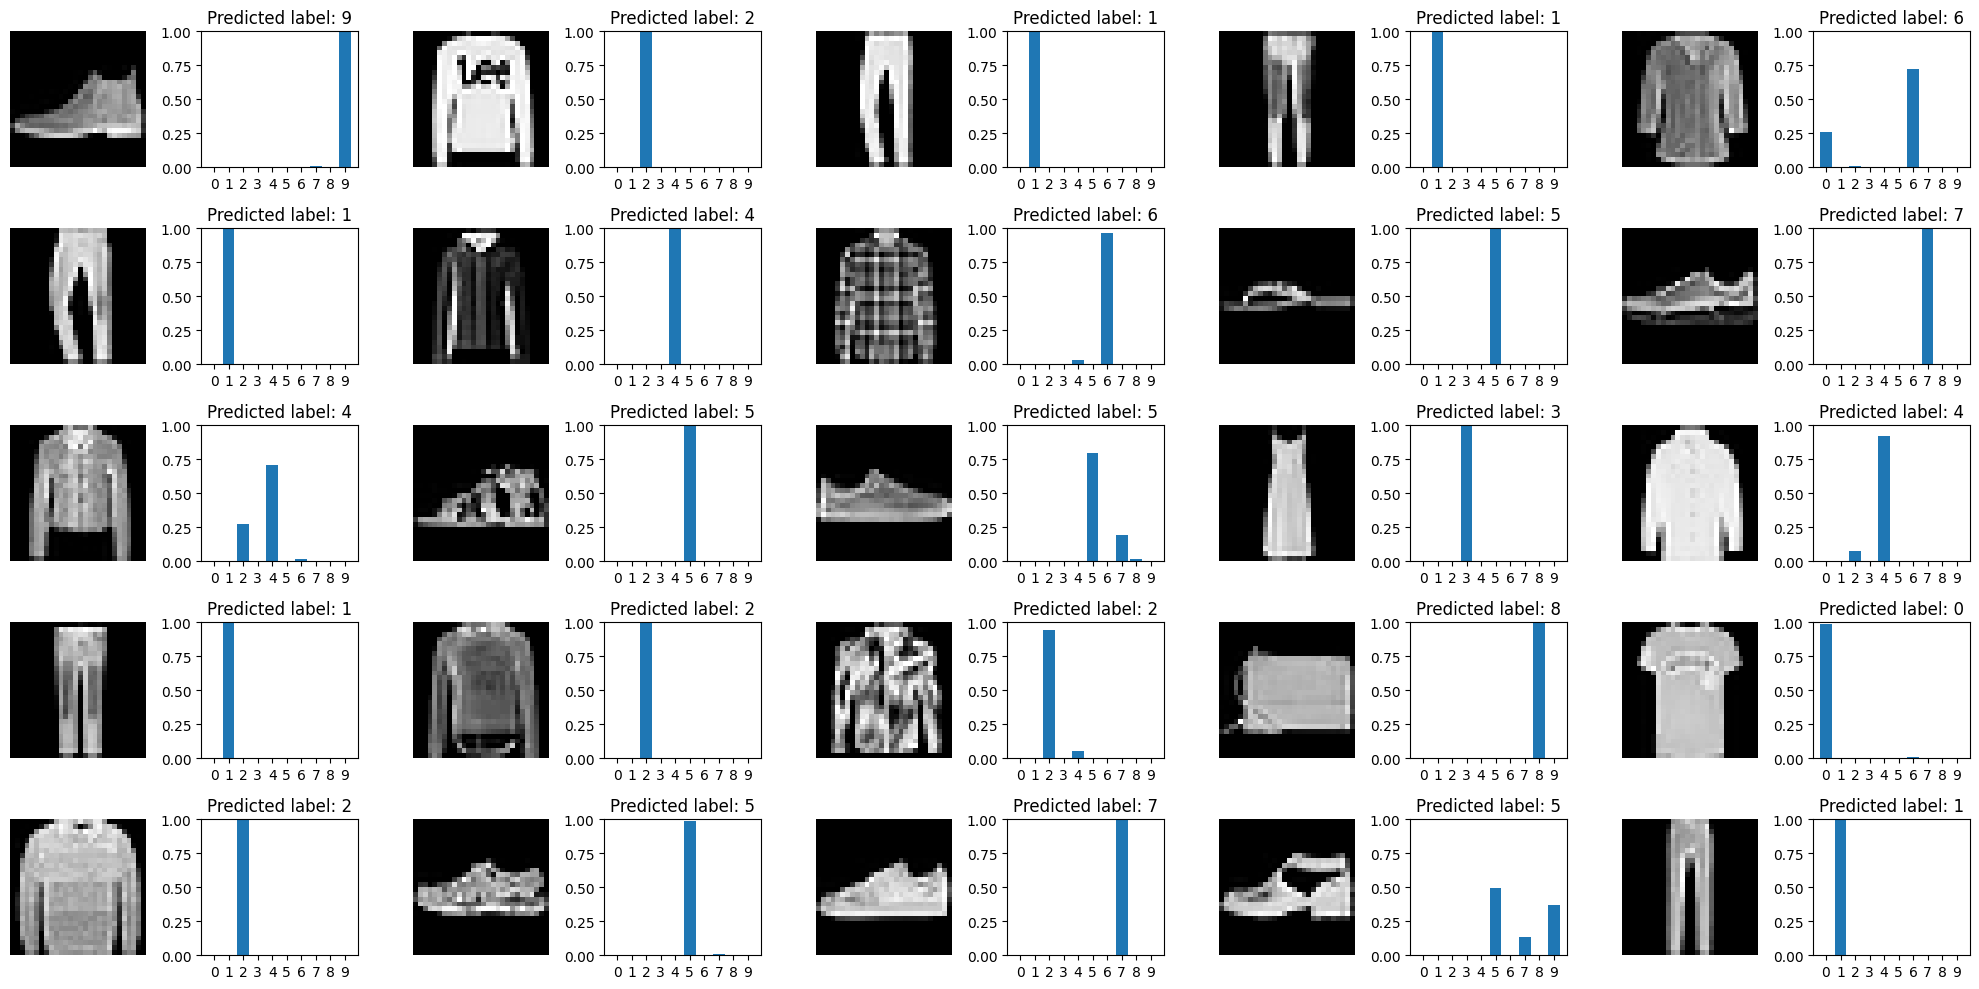

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Show some example images and their predicted labels
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.title(f"Predicted label: {predicted_labels[i]}")
plt.show()
